# Merge Sort

### What is Merge Sort?
Merge sort is a sorting algorithm that works by dividing the input array into smaller subarrays, sorting them, and then merging the sorted subarrays. It's efficient and stable, with applications in sorting large datasets, such as in data science and database management.


## Code

In [ ]:
#Preamble
import multiprocessing
from time import time
import math
import random
import matplotlib.pyplot as plt

### Sequential Implementation
First, we divide a given list into two equal parts. Then, we apply merge sort algorithm recursively on each of these parts until we reach a base case of 0 or 1 element in the sublists. Finally, we merge the two smaller sorted lists to obtain the sorted version of the original list.

In [ ]:
def merge(S1, S2):
  S = []
  i = j = 0
  while len(S) < len(S1) + len(S2):
    if j == len(S2) or (i < len(S1) and S1[i] < S2[j]):
      S.append(S1[i]) #copy ith element of S1 as next item of S
      i += 1
    else:
      S.append(S2[j]) #copy jth element of S2 as next item of S
      j += 1
  return S

In [ ]:
def merge_sort(S):
  n = len(S)
  if n < 2:
    return S #list is already sorted

  #dividing
  mid = n // 2
  S1 = S[0:mid]
  S2 = S[mid:n]

  #conquering (with recursion)
  S1 = merge_sort(S1)
  S2 = merge_sort(S2)

  #merge results
  S = merge(S1, S2)
  return S

In [ ]:
#testing
a = [12,234,4,34,2123913,912,312,931] 
b = merge_sort(a)
print(b)

[4, 12, 34, 234, 312, 912, 931, 2123913]


### Parallel Implementation
To parallelize the sorting process, we partition the list into chunks based on the number of desired processes. Each chunk is then sorted using merge sort in parallel. Finally, we merge the sorted chunks iteratively until only one chunk remains, which represents the complete sorted list.

In [ ]:
def parr_merge_sort(data, num_chunks):
  # dividing data into chunks of size determined by num_chunks
  chunk_size = math.ceil(len(data)/num_chunks) 
  chunks = []
  for i in range(num_chunks):
    chunks.append(data[i*chunk_size:(i+1)*chunk_size])

  #conquering chunks in parallel using Pool class of multiprocessing library
  with multiprocessing.Pool() as pool:
    result = pool.imap_unordered(merge_sort, chunks)
    chunks = []
    for res in result:
      chunks.append(res)

  # merging sorted chunks together iteratively  
  while len(chunks) > 1:
    new_chunks = []
    for i in range(0, len(chunks), 2):
      new_chunks.append(merge(chunks[i], chunks[i+1] if i+1 < len(chunks) else []))
    chunks = new_chunks
  return chunks[0] #single chunk representing the sorted list

In [ ]:
def parr_merge_sort_wrapper(data):
  return parr_merge_sort(data, 8)

In [ ]:
#testing
a = [12,234,4,34,2123913,912,312,931]
b = parr_merge_sort_wrapper(a)
print(b)

### Algorithm Analysis

Algorithm Validity

In [ ]:
#Generate the randomly sorted array of distinct numbers from 1 till size(e.g. 100,000)
def generateArray(size):
  arr = list(range(1,size+1))
  random.shuffle(arr)
  return arr

In [ ]:
#Check Validity of Sorting Algorithm by using 100 test cases
def check_validity(sorting_func):
  valid = True
  for i in range(100):
    lst = generateArray(i**2)
    valid &= sorting_func(lst) == sorted(lst)
  return valid

In [ ]:
print(check_validity(merge_sort))
print(check_validity(parr_merge_sort_wrapper))

True
True


Time Analysis

In [ ]:
#find average time over a given number of runs of searching the list (lst) of size sz using the given search function.
def calculateSortTime(sorting_func, lstGenerator, size, runs):
  totalTime = 0 #store total time across all runs
  for i in range(runs):
    lst = lstGenerator(size)
    start_time = time()
    sorting_func(lst)
    end_time = time()
    totalTime += end_time - start_time #add the time taken to run the given search function
  return totalTime/runs #return average time

Merge sort sorting times:  [0.24680566787719727, 1.223791742324829, 2.4850128173828123, 4.4146984100341795, 7.366507053375244]
Parallel Merge sort sorting times:  [0.29584054946899413, 1.3877430438995362, 2.899243116378784, 4.575018310546875, 7.634238815307617]


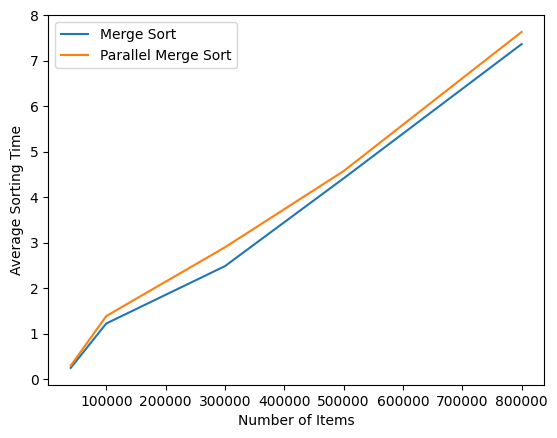

In [ ]:
sizes = [40000, 100000, 300000, 500000, 800000] #the different list sizes
ms_times = [] #to store the avg time taken for the different lists for linear search
p_ms_times = [] #to store the avg time taken for the different lists for sentinel search

runs = 5 #number of runs the time is averaged over

for size in sizes:
    lst = generateArray(size)
    ms_times.append(calculateSortTime(merge_sort, generateArray, size, runs))
    p_ms_times.append(calculateSortTime(parr_merge_sort_wrapper, generateArray, size, runs))



print("Merge sort sorting times: ", ms_times)
print("Parallel Merge sort sorting times: ", p_ms_times)

#plot graph of time against number of items
plt.plot(sizes, ms_times, label="Merge Sort")
plt.plot(sizes, p_ms_times, label="Parallel Merge Sort")

plt.legend(loc="upper left")
plt.xlabel('Number of Items')
plt.ylabel('Average Sorting Time')
plt.show()

Analysis on Local Machine

In [ ]:
sizes = [10000, 40000, 100000, 300000, 500000, 800000, 1000000] #the different list sizes
ms_times = [] #to store the avg time taken for the different lists for linear search
p_ms_times = [] #to store the avg time taken for the different lists for sentinel search

runs = 10 #number of runs the time is averaged over

for size in sizes:
    lst = generateArray(size)
    ms_times.append(calculateSortTime(merge_sort, generateArray, size, runs))
    p_ms_times.append(calculateSortTime(parr_merge_sort_wrapper, generateArray, size, runs))



print("Merge sort sorting times: ", ms_times)
print("Parallel Merge sort sorting times: ", p_ms_times)

#plot graph of time against number of items
plt.plot(sizes, ms_times, label="Merge Sort")
plt.plot(sizes, p_ms_times, label="Parallel Merge Sort")

plt.legend(loc="upper left")
plt.xlabel('Number of Items')
plt.ylabel('Average Sorting Time')
plt.show()

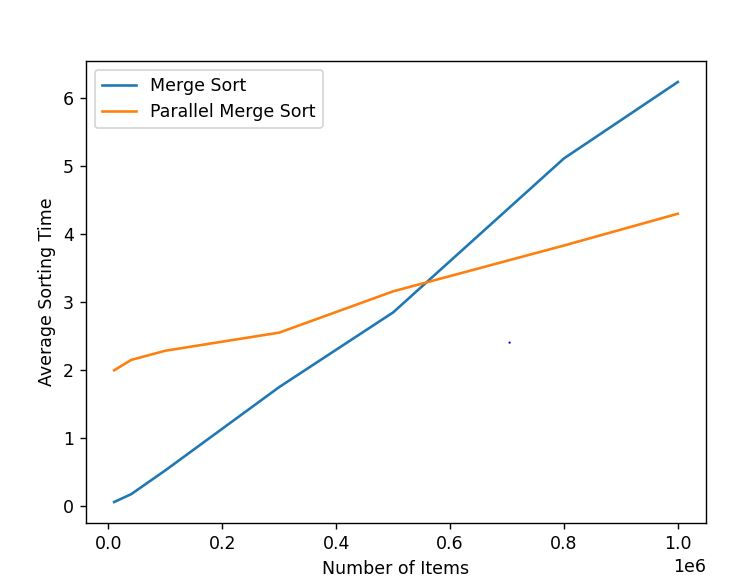

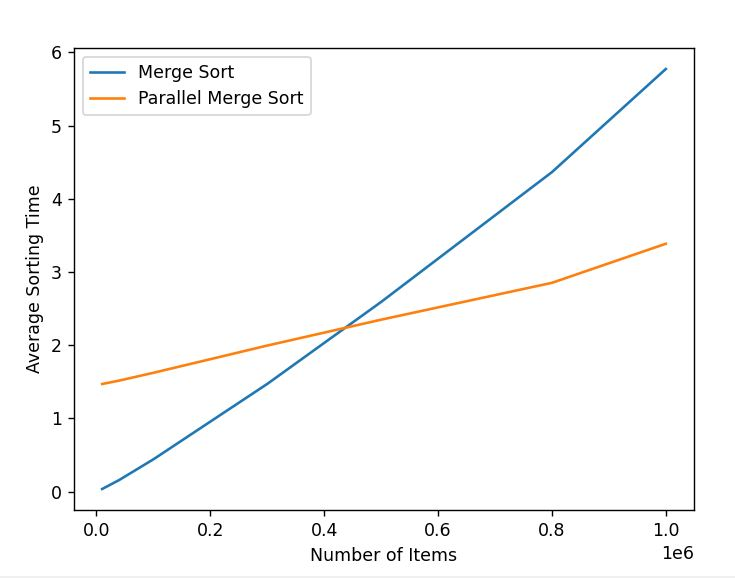

### Result
As the size of the data increases, the parallel algorithm performs better than the sequential one. Moreover, the general shape of the graph seems to be similar. This shows that a parallel algorithm has a similar time complexity but a smaller coefficient which is what we expected. The longer time of execution for smaller inputs indicates that creating a new process has a significant overhead which becomes worthwhile for larger data chunks.